In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# the database used for training
# here the movieID is different from movies

um = pd.read_csv("test/mr_newmovie_names.csv",sep=",")

print(um.shape)
print(um.head(3))

(1000209, 5)
   userID  movieID  rating       time               title
0       1     2969       4  978300019   Girl, Interrupted
1       1     1178       5  978300055  Back to the Future
2       1     1574       4  978300055             Titanic


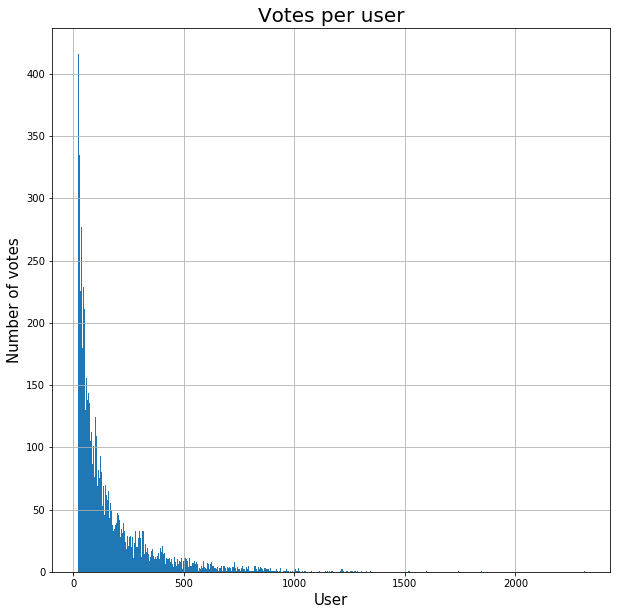

In [4]:
plt.figure(figsize=(10,10))
plt.title("Votes per user", fontsize=20)
# plt.xlabel("User", fontsize=15)
plt.ylabel("Number of votes", fontsize=15)
um['userID'].value_counts().hist(bins=500)
#print(c.head(5))

In [5]:
print("mean of ratings:          {}".format(np.mean(um["rating"])))
print("variance of ratings:     {}".format(np.var(um["rating"])))
print("std deviation of ratings: {}".format(np.std(um["rating"])))

mean of ratings:          3.581564453029317
variance of ratings:     1.2479152852902133
std deviation of ratings: 1.1171012869432266


In [6]:
table = um.groupby(['movieID', 'title']).size()
print(table.sort_values(ascending=False).head(3))
print(table.sort_values(ascending=False).tail(3))

movieID  title                                         
2651     American Beauty                                   3428
253      Star Wars: Episode IV - A New Hope                2991
1106     Star Wars: Episode V - The Empire Strikes Back    2990
dtype: int64
movieID  title           
3152     Song of Freedom     1
2032     Number Seventeen    1
389      Open Season         1
dtype: int64


In [7]:
print(table.mean())
print(table.max())
print(table.min())

269.88909875876953
3428
1


In [8]:
table = pd.pivot_table(um, index=['movieID', 'title'], columns='rating', aggfunc='count', values='userID')
table['num_votes'] = table.sum(axis=1)
print(table.head(10))

rating                                  1      2      3      4      5  \
movieID title                                                           
0       Toy Story                    16.0   61.0  345.0  835.0  820.0   
1       Jumanji                      42.0  108.0  266.0  237.0   48.0   
2       Grumpier Old Men             44.0   95.0  191.0  105.0   43.0   
3       Waiting to Exhale            21.0   47.0   65.0   31.0    6.0   
4       Father of the Bride Part II  28.0   54.0  118.0   80.0   16.0   
5       Heat                         14.0   58.0  216.0  392.0  260.0   
6       Sabrina                      18.0   49.0  179.0  151.0   61.0   
7       Tom and Huck                  4.0   15.0   28.0   18.0    3.0   
8       Sudden Death                 16.0   29.0   33.0   22.0    2.0   
9       GoldenEye                    15.0   87.0  299.0  377.0  110.0   

rating                               num_votes  
movieID title                                   
0       Toy Story        

In [9]:
print(table.isnull().sum())
table.fillna(0, inplace=True)
print(table.isnull().sum())

rating
1            432
2            301
3            194
4            217
5            474
num_votes      0
dtype: int64
rating
1            0
2            0
3            0
4            0
5            0
num_votes    0
dtype: int64


In [10]:
def mean_vote(row):
    if sum(row)==0:
        return 0
    return (row[1] + 2*row[2] + 3*row[3] + 4*row[4] + 5*row[5])/(row[1]+row[2]+row[3]+row[4]+row[5])


def laplace_score(row):
    if sum(row)==0:
        return 0
    
    return (1.*(row[1]+1) + 2.*(row[2]+1) + 3.*(row[3]+1) + 4.*(row[4]+1) + 5.*(row[5]+1))/(row[1]+row[2]+row[3]+row[4]+row[5]+5)


In [11]:
table['mean_vote'] = table.apply(mean_vote, axis=1)
table['laplace_score'] = table.apply(laplace_score, axis=1)
table.head(3)

,rating,1,2,3,4,5,num_votes,mean_vote,laplace_score
movieID,title,,,,,,,,
0,Toy Story,16.0,61.0,345.0,835.0,820.0,2077.0,4.146846,4.144092
1,Jumanji,42.0,108.0,266.0,237.0,48.0,701.0,3.201141,3.199717
2,Grumpier Old Men,44.0,95.0,191.0,105.0,43.0,478.0,3.016736,3.016563


In [12]:
print("max mean vote:     {}".format(table['mean_vote'].max()))
print("min mean vote:     {}".format(table['mean_vote'].min()))
print("max laplace score: {}".format(table['laplace_score'].max()))
print("min laplace score: {}".format(table['laplace_score'].min()))

max mean vote:     5.0
min mean vote:     1.0
max laplace score: 4.551075268817204
min laplace score: 1.489795918367347


In [13]:
print(table.sort_values(['mean_vote'], ascending=False).iloc[:,5:8].head(10))

rating                                      num_votes  mean_vote  \
movieID title                                                      
926     Schlafes Bruder (Brother of Sleep)        1.0        5.0   
3635    Bittersweet Motel                         1.0        5.0   
1652    Follow the Bitch                          1.0        5.0   
3152    Song of Freedom                           1.0        5.0   
744     Gate of Heavenly Peace, The               3.0        5.0   
3054    Baby, The                                 1.0        5.0   
3367    One Little Indian                         1.0        5.0   
3010    Smashing Time                             2.0        5.0   
2955    Ulysses (Ulisse)                          1.0        5.0   
3414    Lured                                     1.0        5.0   

rating                                      laplace_score  
movieID title                                              
926     Schlafes Bruder (Brother of Sleep)       3.333333  
363

In [14]:
print(table.sort_values(['laplace_score'], ascending=False).iloc[:,5:8].head(10))

rating                                                      num_votes  \
movieID title                                                           
309     Shawshank Redemption, The                              2227.0   
1839    Seven Samurai (The Magnificent Seven) (Shichini...      628.0   
802     Godfather, The                                         2223.0   
49      Usual Suspects, The                                    1783.0   
708     Close Shave, A                                          657.0   
513     Schindler's List                                       2304.0   
2698    Sanjuro                                                  69.0   
1066    Wrong Trousers, The                                     882.0   
861     Sunset Blvd. (a.k.a. Sunset Boulevard)                  470.0   
1108    Raiders of the Lost Ark                                2514.0   

rating                                                      mean_vote  \
movieID title                                     

In [15]:
v = um['movieID'].unique()
print(np.sort(v))
print(v.shape)

[   0    1    2 ... 3703 3704 3705]
(3706,)


In [16]:
# bisogna tirare fuori gli index di questa tabella ...

top100t = table.sort_values(['laplace_score'], ascending=False).iloc[:100]
print(top100t.head(5))

rating                                                         1     2      3  \
movieID title                                                                   
309     Shawshank Redemption, The                            8.0  25.0  148.0   
1839    Seven Samurai (The Magnificent Seven) (Shichini...   4.0  11.0   39.0   
802     Godfather, The                                      18.0  38.0  178.0   
49      Usual Suspects, The                                  8.0  31.0  136.0   
708     Close Shave, A                                       3.0   2.0   40.0   

rating                                                          4       5  \
movieID title                                                               
309     Shawshank Redemption, The                           589.0  1457.0   
1839    Seven Samurai (The Magnificent Seven) (Shichini...  149.0   425.0   
802     Godfather, The                                      514.0  1475.0   
49      Usual Suspects, The                    

In [17]:
top100_laplace = []

print(top100t.shape[0])

for _ in range(top100t.shape[0]):
    top100_laplace.append(top100t.to_records()[_][0])
    
top100_laplace = np.array(top100_laplace)

100


In [18]:
print(top100_laplace)

np.save("top100_laplace", top100_laplace)

[ 309 1839  802   49  708  513 2698 1066  861 1108  843  253  713 1090
 1122 1117  689  851 2557 3203 1114  852 1104  862 1158  847 2816 1170
 3081 1131  579 1133 2809 1848 1160 1059 2873 1175 2131 2651 1143 2374
 3197 1107 1192 2918 1065 1142  648 1054  849 2005 1106  892  837 2526
 1113 1168  869 1084  287  838 1162 1134 1123  527  646  842  844 3237
 1765 1180 3236 2164 2167  593 1127 1135 1184  908 1186  858 2021  316
 1155  865 1207 2875 1118 3488 2599  890  106 1055 1100 2729 3235  653
  893 3651]


In [19]:
print(table.sort_values(['num_votes'], ascending=False).iloc[:,5:8].head(10))

rating                                                  num_votes  mean_vote  \
movieID title                                                                  
2651    American Beauty                                    3428.0   4.317386   
253     Star Wars: Episode IV - A New Hope                 2991.0   4.453694   
1106    Star Wars: Episode V - The Empire Strikes Back     2990.0   4.292977   
1120    Star Wars: Episode VI - Return of the Jedi         2883.0   4.022893   
466     Jurassic Park                                      2672.0   3.763847   
1848    Saving Private Ryan                                2653.0   4.337354   
575     Terminator 2: Judgment Day                         2649.0   4.058513   
2374    Matrix, The                                        2590.0   4.315830   
1178    Back to the Future                                 2583.0   3.990321   
579     Silence of the Lambs, The                          2578.0   4.351823   

rating                                 

In [20]:
# highest number of votes

top100t = table.sort_values(['num_votes'], ascending=False).iloc[:100]

In [21]:
top100_num_votes = []

print(top100t.shape[0])

for _ in range(top100t.shape[0]):
    top100_num_votes.append(top100t.to_records()[_][0])
    
top100_num_votes = np.array(top100_num_votes)

100


In [22]:
print(top100_num_votes)

np.save("top100_num_votes", top100_num_votes)

[2651  253 1106 1120  466 1848  575 2374 1178  579 1449 1108  593 2557
  106 2203 1107  513 1485 1173 1025 2426 2785  309  802  346 2511  287
 1148    0 1124 2708  443 3341 1110  527 2775 1167   49   33 2586  737
 2958 1104  858  863 1050 2162 1288 1131  851  971 1123 1478  367 1199
 1820 1059 2898 1215 1563 1574 1788  627 2400 3550   31 1993 2592 2099
 2710 3238  576 2748 1275 2480 1295  578 1618 1445 1212 3186  216  370
 2501 1135 1453 1406 3248 1743  713 2494   38   20 1294 2599  574 2213
 1130  699]


In [23]:
intersection = np.in1d(top100_num_votes, top100_laplace)
print(sum(intersection))

26


In [24]:
intersection = np.intersect1d(top100_num_votes, top100_laplace)
print(intersection)
print(intersection.shape[0])

[  49  106  253  287  309  513  527  579  593  713  802  851  858 1059
 1104 1106 1107 1108 1123 1131 1135 1848 2374 2557 2599 2651]
26


In [152]:
print(table.loc[intersection, 1].head(10))

movieID  title                                                               
49       Usual Suspects, The                                                      8.0
106      Braveheart                                                              37.0
253      Star Wars: Episode IV - A New Hope                                      19.0
287      Pulp Fiction                                                            47.0
309      Shawshank Redemption, The                                                8.0
513      Schindler's List                                                        19.0
527      Blade Runner                                                            13.0
579      Silence of the Lambs, The                                               37.0
593      Fargo                                                                   57.0
713      Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb     8.0
Name: 1, dtype: float64
